In [164]:
import random
import matplotlib
import pylab as plt


We will use 8 byte encoding of characters and default to "latin-1". This allows 256! (factorial) substitution maps (keys), this is a huge keyspace.

In [101]:
substitution_map = random.sample(range(256),256)
encoding_map = dict(zip(range(256), substitution_map))
decoding_map = dict(zip(substitution_map, range(256)))

The following two functions encode and decode a file. Binary is used for reading and writing so no encoding is required.

In [206]:
def encode_file(input_file, output_file, encoding_map):
    with open(input_file, "rb") as infile, open(output_file, "w+b") as outfile:
        byte = infile.read(1).lower()
        while byte:
            newbyte = bytes([encoding_map[byte[0]]])
            outfile.write(newbyte)
            byte = infile.read(1).lower()
            
def decode_file(input_file, output_file, decoding_map):
    with open(input_file, "rb") as infile, open(output_file, "w+b") as outfile:
        byte = infile.read(1)
        while byte:
            newbyte = bytes([decoding_map[byte[0]]])
            outfile.write(newbyte)
            byte = infile.read(1)

Run a basic test on the encoding/decoding.

In [208]:
encode_file("big.txt", "cyphertext.txt", encoding_map)
decode_file("cyphertext.txt", "decoded.txt", decoding_map)

The net two functions encode and decode strings, here we have to concern ourselves with encoding.

In [106]:
def encode_string(string, encoding_map):
    return "".join(map(lambda x: chr(x), bytes(map(lambda x: encoding_map[x], bytes(string, 'latin-1')))))

def decode_string(string, encoding_map):
    return "".join(map(lambda x: chr(x), bytes(map(lambda x: decoding_map[x], bytes(string, 'latin-1')))))

Again, another simple test case.

In [107]:
plaintext = "Hello Dara!"
cyphertext = encode_string(plaintext, encoding_map)
decodedtext =  decode_string(cyphertext, decoding_map)
(plaintext, cyphertext, decodedtext)

('Hello Dara!', "ÉÖôôÝ,4Ù¾Ù'", 'Hello Dara!')

In [117]:
def get_char_dist(input_file):
    char_count = dict(((i,0) for i in range(256)))
    with open(input_file, "rb") as infile:
        byte = infile.read(1)
        while byte:
            char_count[byte[0]] += 1
            byte = infile.read(1)
    return char_count
        

In [293]:
counts_plain = list(get_char_dist("big.txt").items())
counts_plain.sort(reverse=True, key=lambda x: x[1])

counts_cypher = list(get_char_dist("cyphertext.txt").items())
counts_cypher.sort(reverse=True, key=lambda x: x[1])

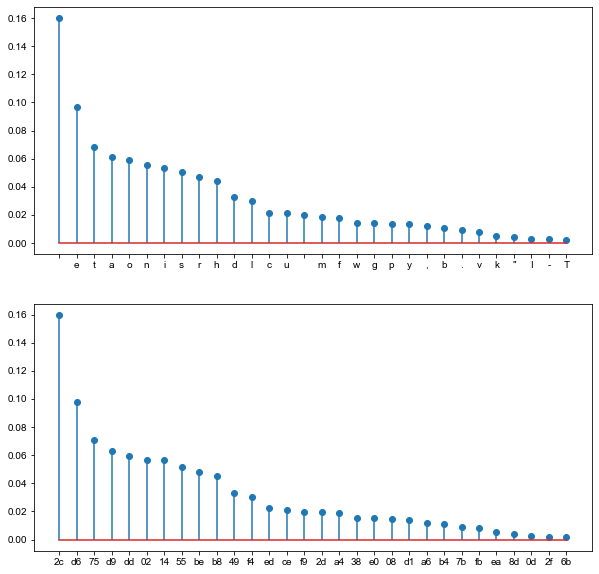

In [311]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

N = sum([f for i, f in counts_plain]) # if i in range(ord('a'), ord('z')+1) or i == ord(' ')]) 
#freq_plain = [(chr(i), f/N) for i, f in counts_plain if i in range(ord('a'), ord('z')+1) or i == ord(' ')]
freq_plain = [(chr(i), f/N) for i, f in counts_plain[0:30]]

ax1.stem([j for i, j in freq_plain], use_line_collection=True)
ax1.set_xticks(range(30))
ax1.set_xticklabels([f"{chr(i)}" for i, j in counts_plain[0:30]])

M = sum([f for i, f in counts_cypher]) 
freq_cypher = [(i, f/M) for i, f in counts_cypher[0:30]]

ax2.stem([f for i, f in freq_cypher], use_line_collection=True)
ax2.set_xticks(range(30))
a = ax2.set_xticklabels([f"{i:02x}" for i, j in counts_cypher[0:30]])

# English Letter Frequency
Eglish letter frequencies can be found on-line. Our frequency table is taken from [WikiPedia](https://en.wikipedia.org/wiki/Letter_frequency). The following need not be run as the frequencies have been precomputed.

In [305]:
import pandas as pd

def get_freqs():
    freqs = pd.read_excel("LetterFrequency.xlsx")
    eng_freq = freqs[['Letter','English']]
    N = len(eng_freq)
    eng_freq_sorted = eng_freq.sort_values(by='English',ascending=False)
    eng_freqs = [[' ', 0.15641]] + [list(eng_freq_sorted.iloc[i,0:2]) for i in range(26)]
    return eng_freqs

In [306]:
eng_freqs = [[' ', 0.15641],
 ['e', 0.12702],
 ['t', 0.09056],
 ['a', 0.08167],
 ['o', 0.07507],
 ['i', 0.06966],
 ['n', 0.06749],
 ['s', 0.06327],
 ['h', 0.06094],
 ['r', 0.05987],
 ['d', 0.04253],
 ['l', 0.04025],
 ['c', 0.02782],
 ['u', 0.02758],
 ['m', 0.02406],
 ['w', 0.0236],
 ['f', 0.02228],
 ['g', 0.02015],
 ['y', 0.01974],
 ['p', 0.01929],
 ['b', 0.01492],
 ['v', 0.00978],
 ['k', 0.00772],
 ['j', 0.00153],
 ['x', 0.0015],
 ['q', 0.00095],
 ['z', 0.00074]]

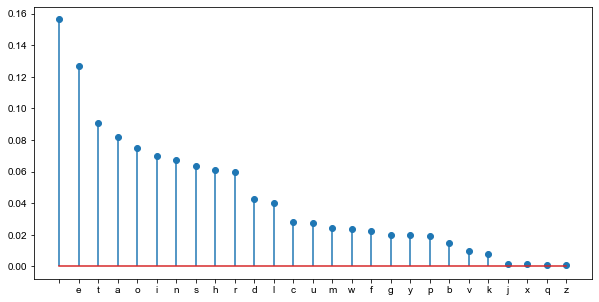

In [308]:
fig, ax = plt.subplots(figsize=(10,5))
ax.stem([j for i,j in eng_freqs], use_line_collection=True)
ax.set_xticks(range(27))
a = ax.set_xticklabels([i for i, j in eng_freqs])

In [319]:
break_dict = dict(zip([i for i, j in counts_cypher[:27]], [i for i, j in eng_freqs]))
break_dict[counts_cypher[0][0]] = ' '
for i in range(256):
    break_dict.setdefault(i,'?')

In [317]:
def break_file(input_file, output_file, decoding_map):
    with open(input_file, "rb") as infile, open(output_file, "w+b") as outfile:
        byte = infile.read(1)
        while byte:
            newbyte = bytes([ord(decoding_map[byte[0]])])
            outfile.write(newbyte)
            byte = infile.read(1)

TypeError: unhashable type: 'list'

In [326]:
break_dict[190] = 'r'
break_dict[184] = 'h'
break_dict[56] = 'y'
break_dict[224] = 'p'
break_dict[8] = 'g'
break_dict[255] = 'j'
break_dict[2] = 'n'
break_dict[20] = 'i'
break_dict[180] = 'b'
break_dict[234] = 'k'

In [327]:
break_file("cyphertext.txt", "broken.txt", break_dict)

In [283]:
int(0xff)

255

In [275]:
break_dict


{214: 'e',
 117: 't',
 217: 'a',
 221: 'o',
 2: 'i',
 20: 'n',
 85: 's',
 190: 'h',
 184: 'r',
 73: 'd',
 244: 'l',
 237: 'c',
 206: 'u',
 249: 'm',
 45: 'w',
 164: 'f',
 56: 'g',
 224: 'y',
 8: 'p',
 209: 'b',
 166: 'v',
 180: 'k',
 123: 'j',
 251: 'x',
 234: 'q',
 141: 'z',
 44: ' ',
 0: '?',
 1: '?',
 3: '?',
 4: '?',
 5: '?',
 6: '?',
 7: '?',
 9: '?',
 10: '?',
 11: '?',
 12: '?',
 13: '?',
 14: '?',
 15: '?',
 16: '?',
 17: '?',
 18: '?',
 19: '?',
 21: '?',
 22: '?',
 23: '?',
 24: '?',
 25: '?',
 26: '?',
 27: '?',
 28: '?',
 29: '?',
 30: '?',
 31: '?',
 32: '?',
 33: '?',
 34: '?',
 35: '?',
 36: '?',
 37: '?',
 38: '?',
 39: '?',
 40: '?',
 41: '?',
 42: '?',
 43: '?',
 46: '?',
 47: '?',
 48: '?',
 49: '?',
 50: '?',
 51: '?',
 52: '?',
 53: '?',
 54: '?',
 55: '?',
 57: '?',
 58: '?',
 59: '?',
 60: '?',
 61: '?',
 62: '?',
 63: '?',
 64: '?',
 65: '?',
 66: '?',
 67: '?',
 68: '?',
 69: '?',
 70: '?',
 71: '?',
 72: '?',
 74: '?',
 75: '?',
 76: '?',
 77: '?',
 78: '?',
 